<img src="Custom_Dataset-1.png">

# 05. PyTorch Custom Datasets

Getting our own data into PyTorch.

One of the ways to do so is via: Custom Datasets.

## Domain Libraries

Depending o what you're working on, vision, text, audio, recommendation, you'll want to look into each of the PyTorch domain libraries for existing data loading functions and customizable data loading functions.
> Text - `torchtext`

> Vision - `torchvision`

> Recommendation - `torchRec`

> Audio - `torchaudio`

**Resources**
* Book version - https://www.learnpytorch.io/04_pytorch_custom_datasets/
* Ground Truth Version - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/04_pytorch_custom_datasets.ipynb
    


## 0. Importing PyTorch and setting up device-agnostic code

In [1]:
import torch
from torch import nn
import torchvision

torch.__version__

'1.13.1'

In [2]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 1. Get Data

Our dataset is a subset of the Food101 dataset.

Food101 starts with 101 different classes of food and 1000 images per class (750 training and 250 testing)

Our dataset starts with 3 classes of food and only 10% of the images (75 training and 25 testing)

Why do this?

When starting out ML projects, it's important to try things ona small scale and then increase the scale when necessary.

In [1]:
import requests
import zipfile
from pathlib import Path

# Setup path to a data folder
data_path = Path("data/")
image_path= data_path / "pizza_sushi_steak"

# If the image folder doesn't exist, download it and prepare it
if image_path.is_dir():
    print(f"{image_path} directory already exist... skipping download")
else:
    print(f"{image_path} doesn't exist, creating one")
    image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak and sushi data
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print(f"Downloading pizza, steak and sushi data...")
    f.write(request.content)
    
# Unzip pizza, steak sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
    print("Unzipping pizza, steak and sushi data")
    zip_ref.extractall(image_path)

data\pizza_sushi_steak directory already exist... skipping download
Unzipping pizza, steak and sushi data


## 2. Becoming one with the data (data preparation and data exploration)

In [4]:
import os
def walk_through_dir(dir_path):
    """
    Walks through dir_path, returning its contents.
    """
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} direcories and {len(filenames)} images in '{dirpath}'.")

In [5]:
walk_through_dir(image_path)

There are 2 direcories and 0 images in 'data\pizza_sushi_steak'.
There are 3 direcories and 0 images in 'data\pizza_sushi_steak\test'.
There are 0 direcories and 25 images in 'data\pizza_sushi_steak\test\pizza'.
There are 0 direcories and 19 images in 'data\pizza_sushi_steak\test\steak'.
There are 0 direcories and 31 images in 'data\pizza_sushi_steak\test\sushi'.
There are 3 direcories and 0 images in 'data\pizza_sushi_steak\train'.
There are 0 direcories and 78 images in 'data\pizza_sushi_steak\train\pizza'.
There are 0 direcories and 75 images in 'data\pizza_sushi_steak\train\steak'.
There are 0 direcories and 72 images in 'data\pizza_sushi_steak\train\sushi'.


In [6]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(WindowsPath('data/pizza_sushi_steak/train'),
 WindowsPath('data/pizza_sushi_steak/test'))

### 2.1 Visualizing Images

Let's write some code to :
1. Get all of the image paths
2. Pick a random image path using Python's random.choice()
3. Get the image class name `pathlib.Path.parent.stem`
4. Since we're working with image, lets optn the image with Python's PIL.
5. We'll then show the image and print metadata

Random image path: data\pizza_sushi_steak\test\pizza\1687143.jpg
Image Class: pizza
Image Height: 512
Image width: 512


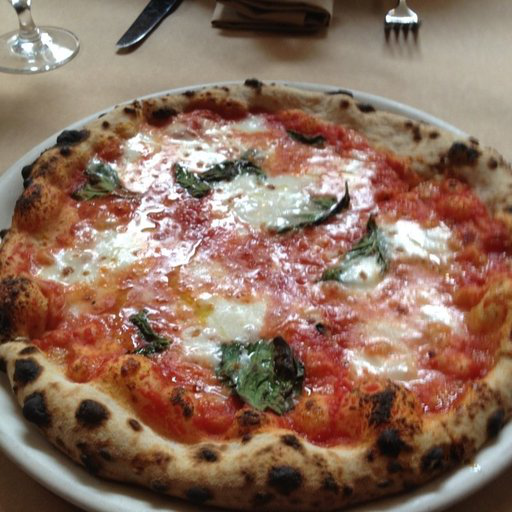

In [7]:
import random
from PIL import Image

# Set seed
# random.seed(42)

# 1. Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))  # Glob sticks all of them together
# first star gets into train folder, second star get the inner folder and last one gets the image

# 2. Pick a random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem    

# 4. Open Image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image Class: {image_class}")
print(f"Image Height: {img.height}")
print(f"Image width: {img.width}")
img

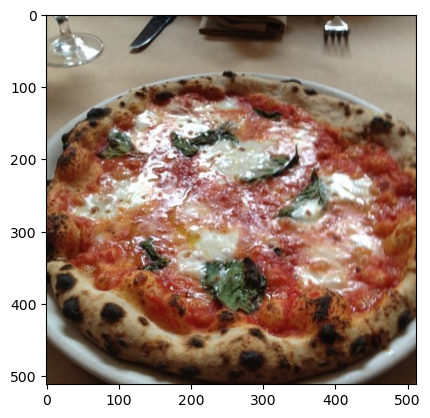

In [8]:
# Using matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as matimg

check_image = matimg.imread(random_image_path)
plt.imshow(check_image)

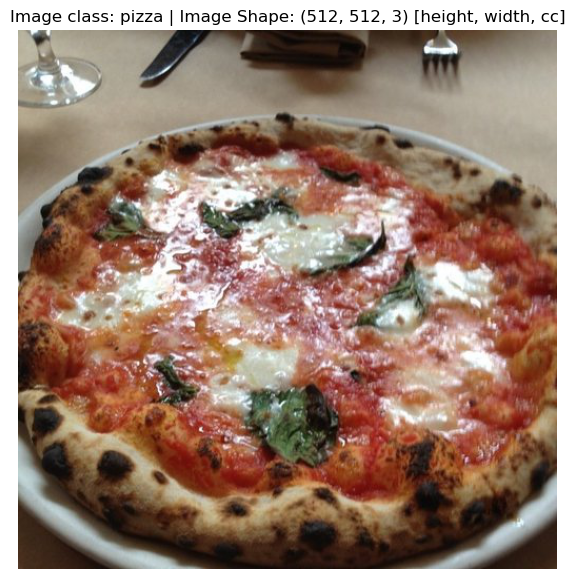

In [9]:
# Other method
import numpy as np

img_as_array = np.asarray(img)

# Plot the image using matplotlib
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image Shape: {img_as_array.shape} [height, width, cc]")
plt.axis(False);

## 3. Transforming Data

Before we can use our image data with PyTorch: 
1. Turn your target data into tensors (in our case, numerical repersentation of image)
2. Turn it into a `torch.utils.data.Dataset` and subsequentely a `torch.utils.data.DataLoader`

In [10]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

### 3.1 Transforming data with `torchvision.transforms`

https://pytorch.org/vision/stable/transforms.html

In [11]:
# Write a transform for image
data_transform = transforms.Compose([
    # Resize our image to 64x64 for TinyVGG architecture
    transforms.Resize(size=(64, 64)),
    
    # Flip the images randomly (data augmentation)
    transforms.RandomHorizontalFlip(p=0.5),   # 50% probability
    
    # Turn image into Tensor
    transforms.ToTensor()
])

In [12]:
data_transform(img).shape

torch.Size([3, 64, 64])

### 3.2 Visualizing our Transformed Images

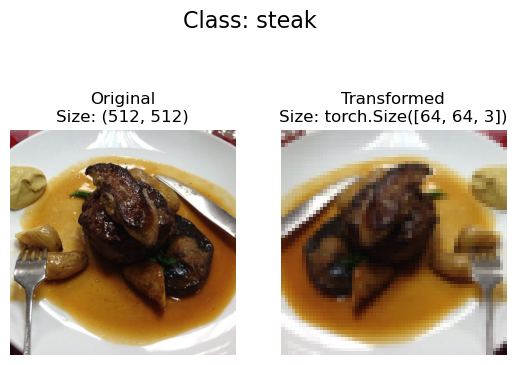

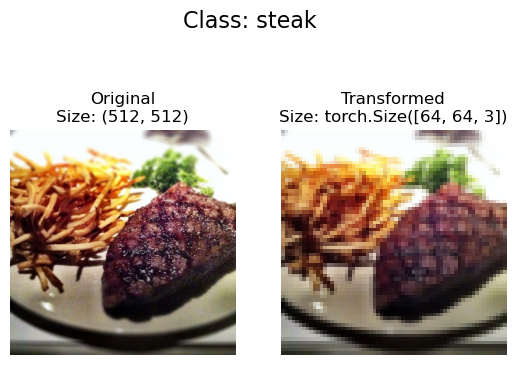

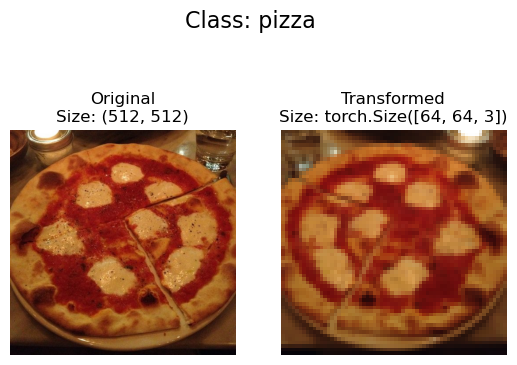

In [13]:
def plot_transformed_image(image_paths: list, transform, n=3, seed=None):
    """
    Selects random images from path of images and loads/transforms them.
    Plot the original  vs transformed version.
    """
    
    if seed:
        random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original\nSize: {f.size}")
            ax[0].axis(False)
            
            # Transform and plot target image
            transformed_image = transform(f).permute(1, 2, 0)  # We will need to change the shape for matplotlib (C, H, W) -> (H, W,C)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed\nSize: {transformed_image.shape}")
            ax[1].axis(False)
            
            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)
            
            
plot_transformed_image(image_paths=image_path_list,
                      transform=data_transform,
                      n=3,
                      seed=None)

## 4. Option 1: Loading image data using `ImageFolder`

We can load image classification data using `torchvision.datasets.ImageFolder`

https://pytorch.org/vision/stable/generated/torchvision.datasets.ImageFolder.html?highlight=imagefolder#torchvision.datasets.ImageFolder

In [14]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                 transform=data_transform,  # Transform for data
                                 target_transform=None)  # Tansform for label

test_data = datasets.ImageFolder(root=test_dir,
                                transform=data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data\pizza_sushi_steak\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data\pizza_sushi_steak\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [15]:
# Get class names as list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [16]:
# Get class names as dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [17]:
# Check the lengths of our dataset
len(train_data), len(test_data)

(225, 75)

In [18]:
train_data.samples[0]

('data\\pizza_sushi_steak\\train\\pizza\\1008844.jpg', 0)

In [19]:
# Index on the train_data Dataset tio get a single iamge and label
img, label = train_data[0][0] , train_data[0][1]
print(f"Image tensor:\n {img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image Label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
 tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0863],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0706],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0196,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.0

Original Shape: torch.Size([3, 64, 64]) -> [cc, height, width]
Image permute: torch.Size([64, 64, 3]) -> [height, width, cc]


Text(0.5, 1.0, 'pizza')

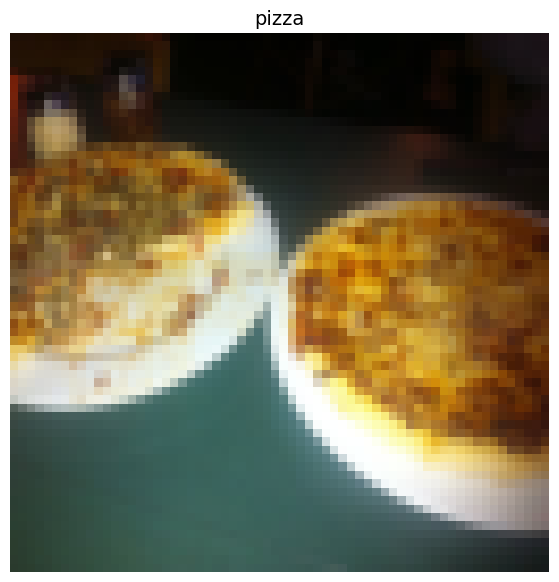

In [20]:
# Rearrange the order of dimensions
img_permute = img.permute(1, 2, 0)

# Print out different shapes
print(f"Original Shape: {img.shape} -> [cc, height, width]")
print(f"Image permute: {img_permute.shape} -> [height, width, cc]")

# PLot the image
plt.figure(figsize=(10, 7))
plt.imshow(img_permute)
plt.axis("Off")
plt.title(class_names[label], fontsize=14)

### 4.1 Turn loaded images into `Dataloader`'s

A `Dataloader` is going to help us turn our `Dataset` into iterables and we can customzie the `batch_size` so our model can see `batch_size` images at a time.

In [21]:
# Turn train and test datasets into DataLoaders
from torch.utils.data import DataLoader

BATCH_SIZE = 1

train_dataloader = DataLoader(dataset=train_data,
                             batch_size=BATCH_SIZE,
                             shuffle=True,
                             num_workers=1) # No. of cpu cores | use os.cpu_count() for maximum

test_dataloader = DataLoader(dataset=test_data,
                            batch_size=BATCH_SIZE,
                            shuffle=False,
                            num_workers=1)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x2cb4f251820>,
 <torch.utils.data.dataloader.DataLoader at 0x2cb4f2517f0>)

In [22]:
len(train_dataloader), len(test_dataloader), len(test_data)

(225, 75, 75)

In [23]:
img, label = next(iter(train_dataloader))

# Batch size will now be 1, you can change the batch size if you like
print(f"Image shape: {img.shape} -> [bathc_size, cc, height, width]")
print(f"Label Shape: {label.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [bathc_size, cc, height, width]
Label Shape: torch.Size([1])


## 5. Option 2: Loading Image data with a custom `dataset`

1. Want to be able to load image(any data) from files
2. Want to be able to get classes names from Dataset.
3. Want to be able to get classes as dictionary from Dataset.

Pros: 
* Can create a `dataset` out of anything.
* Not limited to PyTorch pre-built `dataset` functions.

Cons:
* Even though you could create `Dataset` out of anything, it doesn't mean it will work...
* Using a custom `dataset` often results in writing a lot of code, which could prone to errorrs or performance issues.

All custom datasets in PyTorch, often subclass - https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset

In [24]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [25]:
# Instance of torchvision.datasets.ImageFolder()
train_data.classes, train_data.class_to_idx     # Want to replicate this

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.1 Creating a helper function to get class names

We want a function to:
1. Get the class names using `os.scandir()` to traverse a target directory.
2. Raise an error if the class names aren't found (if this happens, there might be something wrong with the directoy structure.)
3. Turn the class names into a dict and list and return them.

In [26]:
# Setup path for target directory
target_directory = train_dir
print(f"Target Dir: {target_directory}")

# Get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

Target Dir: data\pizza_sushi_steak\train


['pizza', 'steak', 'sushi']

In [27]:
def find_classes(directory: str)-> Tuple[List[str], Dict[str, int]]:
    """
    Finds the class folder names in a target directory.
    """
    # 1. Get the class names by scanning the target directory
    classes = sorted([entry.name for entry in os.scandir(directory) if entry.is_dir()])
    
    # 2. Raise an error if clas names could  not be found
    if not classes:
        raise FileNotFoundError(f"Couldn't find any classes in {directory}... please check file structure.")
    
    # 3. Create a dictionary of index labels (computers prefer numbers than string as labels)
    class_to_idx = {class_name: i for i, class_name in enumerate(classes)}
    
    return classes, class_to_idx

In [28]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.2 Create a custom `Dataset` to replicate `ImageFolder`

To create our own custom dataset, we want to:

1. subclass `torch.utils.data.Dataset`
2. init our subclass with a target directory (the directory we'd like to get data from) as well as transform if we'd like to transform our data.
3. Create several attributes:
    * paths - paths of our images
    * transform -  the transform we'd like to use
    * classes  - a list of the target classes
    * class_to_idx - a dict of the target classes mapped to interger labels
4. Create a funtion to `load_images()` this function will open an image.
5. Overwrite the `__len()__` method to return the length of our dataset.
6. Overwrite the `__getitem()__` method to return a given sample when passed an index

In [29]:
# Write a custom dataset class
from torch.utils.data import Dataset

# 1. Subsclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
    # 2. Initialize our custom dataset
    def __init__(self, 
                 targ_dir: str, 
                 transform=None):
        # 3. Create class attributes
        # Get all of image paths
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
        # Setup transforms
        self.transform = transform
        # Create classes and class_to_idx
        self.classes, self.class_to_idx = find_classes(targ_dir)
        
    # 4. Create a function to load images
    def load_image(self, index: int) -> Image.Image:
        """Opens an image via path and returns it"""
        image_path = self.paths[index]
        return Image.open(image_path)
    
    # 5. Overwrite __len__()
    def __len__(self)-> int:
        """ Returns the toal number of samples"""
        return len(self.paths)
    
    # 6. Overwrite __getitem__() to return a particular sample
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        """ Returns one sample of data, data and label (X, y)"""
        img = self.load_image(index)
        class_name = self.paths[index].parent.name #expects path in format: data_folder/class_name/image.jpg
        class_idx = self.class_to_idx[class_name]
        
        # Transform if necessary
        if self.transform:
            return self.transform(img), class_idx  #return data, label (X, y)
        else:
            return img, class_idx  #return untransformed data, label

In [30]:
# Create a transform 
from torchvision import transforms
train_transforms = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
    ])

test_transforms =  transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

In [31]:
# Test out ImageFolderCustom
train_data_custom  = ImageFolderCustom(targ_dir = train_dir,
                                      transform=train_transforms)

test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                    transform=test_transforms)

In [32]:
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x2cb4f251a90>,
 <__main__.ImageFolderCustom at 0x2cb4f251bb0>)

In [33]:
len(train_data), len(train_data_custom), len (test_data), len(test_data_custom)

(225, 225, 75, 75)

In [34]:
train_data_custom.classes , train_data_custom.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [35]:
# Check for equality between original ImageFolder Dataset and ImageFolderCustom Dataset
print(train_data_custom.classes == train_data.classes)
print(test_data_custom.classes == test_data.classes)

True
True


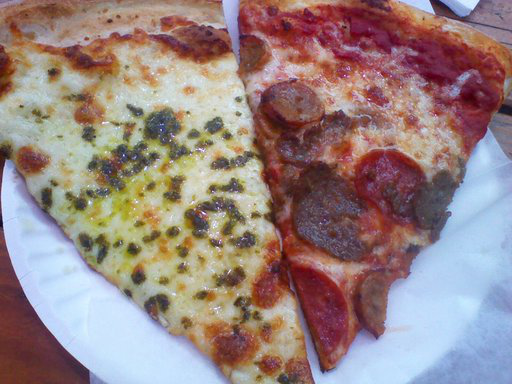

In [36]:
train_data_custom.load_image(index=12)

### 5.3 Create a function to display random images

1. Take in a `Dataset` and a number of other parameters such as scalss name and how many images to visualize.
2. To prevent the display getting out of hand, let's cap the number of images to see at 10.
3. Set the random seed for reproducability.
4. Get a list of random sample indexes from the target dataset.
5. Setup a matplotlib plot
6. Loop through the random sample indexes and plot them with matplotlib.
7. Make sure the dimensions of our images line up with matplotlib.


In [37]:
# 1. Create a function to take in a dataset
def display_random_images(dataset: torch.utils.data.Dataset,
                         classes: List[str] = None,
                         n: int=10,
                         display_shape: bool=True,
                         seed: int=None):
    #2. Adjust display if n itoo high
    if n > 10:
        n = 10
        display_shape = False
        print(f"For display purpose, n shouldn't be larget than 10, setting to 10 and removing shape display.")
        
    # 3. Set the seed
    if seed:
        random.seed(seed)
        
    # 4. Get random sample indexes
    random_samples_idx = random.sample(range(len(dataset)), k=n)
    
    # 5. Setup plot
    plt.figure(figsize=(16,8))
    
    # 6. loop through random indexes and plot them with matplotlib
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]
        
        # 7. Adjust tensor dimensions for plotting
        targ_image_adjust = targ_image.permute(1, 2, 0) # [cc, height, width] -> [height, width, cc]
        
        # Plot adjusted samples
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title = f"Class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)
    

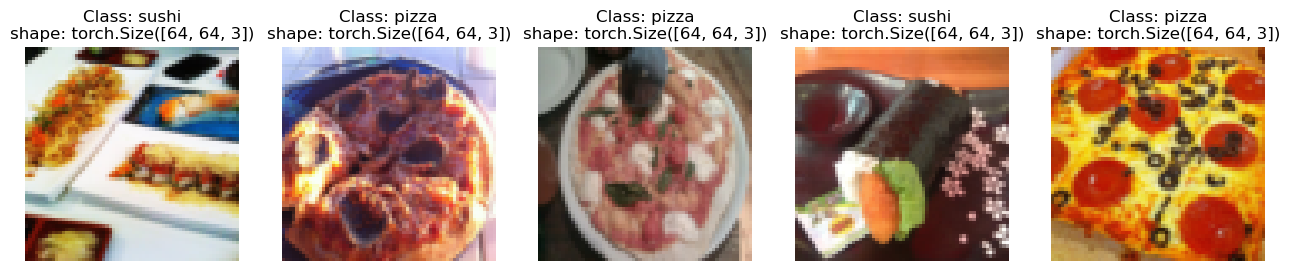

In [38]:
# Display random images from ImageFolder created Dataset
display_random_images(train_data,
                     n=5, 
                     classes=class_names,
                     seed=42)

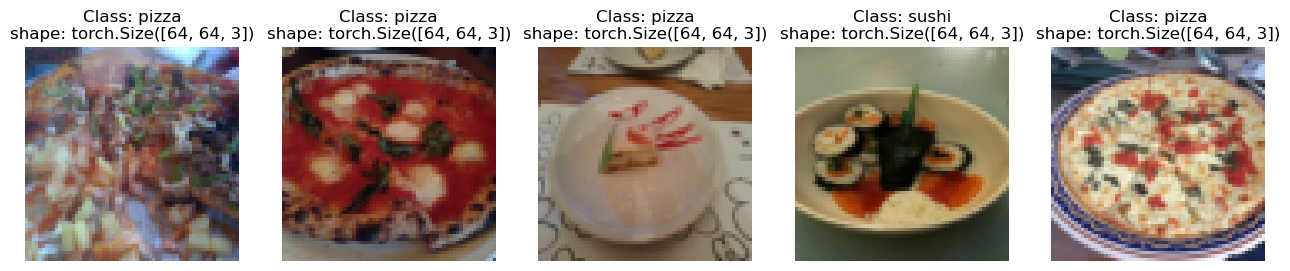

In [39]:
# Display random images from ImageFolderCustom Dataset
display_random_images(train_data_custom,
                     n=5,
                     classes=class_names,
                     seed=None)

### 5.4 Turn custom loaded images into `DataLoader`s

In [40]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader_custom = DataLoader(dataset=train_data_custom,
                                    batch_size=BATCH_SIZE,
                                    shuffle=True,
                                    num_workers=0)

test_dataloader_custom = DataLoader(dataset=test_data_custom,
                                   batch_size=BATCH_SIZE,
                                   shuffle=False,
                                   num_workers=0)

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x2cb4fff5c10>,
 <torch.utils.data.dataloader.DataLoader at 0x2cb4fff5d30>)

In [41]:
# Get image and label from custom dataloader
img_custom, label_custom = next(iter(train_dataloader_custom))

# Print out shapes
img_custom.shape, label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

## 6. Other forms of transforms (data augmentation)

Data Augmentation is the process of artificially adding diversit to your training data.

In the case of image data, this may mean applying various image transformations to image data.

This practice hopefully results in a model that is more generalized to unseen data.

Let's take a look at one particular type of data augmentation used to train PyTorch vision models to SOTA levels...



https://pytorch.org/blog/how-to-train-state-of-the-art-models-using-torchvision-latest-primitives/

In [42]:
# Let's take a look at trivail augment
from torchvision import transforms

train_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31), # 0:31 , how intense we want
    transforms.ToTensor()
])


test_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor()
])

In [43]:
# Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list[:5]

[WindowsPath('data/pizza_sushi_steak/test/pizza/1152100.jpg'),
 WindowsPath('data/pizza_sushi_steak/test/pizza/1503858.jpg'),
 WindowsPath('data/pizza_sushi_steak/test/pizza/1687143.jpg'),
 WindowsPath('data/pizza_sushi_steak/test/pizza/1925494.jpg'),
 WindowsPath('data/pizza_sushi_steak/test/pizza/194643.jpg')]

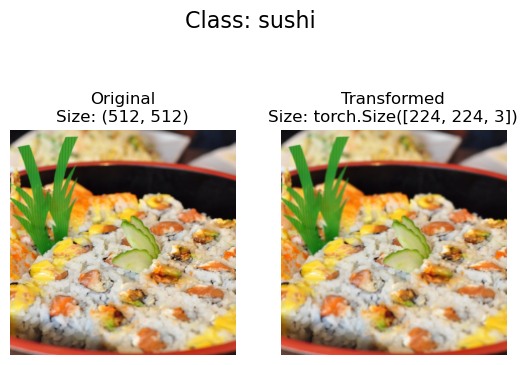

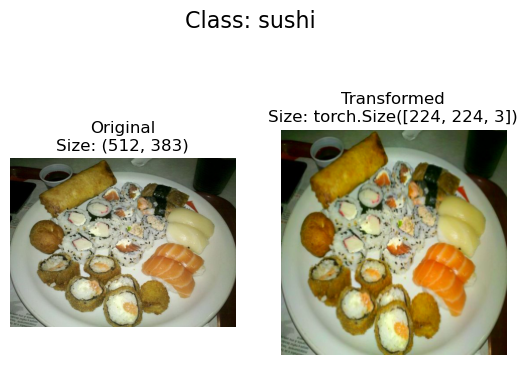

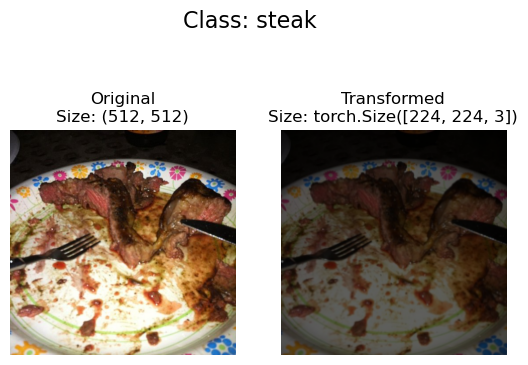

In [44]:
# Plot random transformed images
plot_transformed_image(
image_paths=image_path_list,
transform=train_transform,
n=3,
seed=None)

## 7. Model 0: TinyVGG without data augmentation

Let's replicate TinyVGG architecture from the CNN Expainer website.

### 7.1 Creating transforms and loading data for Model 0

In [45]:
# Create a simple transform 
simple_transform  = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

In [46]:
# 1. Loading data and transform

train_data_simple = datasets.ImageFolder(root=train_dir,
                                        transform=simple_transform,
                                        target_transform=None)

test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=simple_transform)

# 2. Turn datasets into dataloaders
import os
from torch.utils.data import DataLoader

# Setup batch size
BATCH_SIZE= 32
NUM_WORKERS = 2 #os.cpu_count()

# Create dataloader
train_dataloader_simple = DataLoader(dataset=train_data_simple,
                                    num_workers=NUM_WORKERS,
                                    batch_size=BATCH_SIZE,
                                    shuffle=True)

test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                   batch_size=BATCH_SIZE,
                                   num_workers=NUM_WORKERS,
                                   shuffle=False)

### 7.2 Creating a TinyVGG model class

In [47]:
class TinyVGG(nn.Module):
    """ Model architecture copying TinyVGG from CNN Explainer website."""
    def __init__(self, input_shape: int,
                hidden_units: int,
                output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=0),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     stride=1,
                     kernel_size=3,
                     padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     padding=0,
                     stride=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     padding=0,
                     stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*13*13,
                     out_features=output_shape)
        )
        
    def forward(self, x):
#         x = self.conv_block_1(x)
#         x = self.conv_block_2(x)
#         x = self.classifier(x)
#         return x
        return self.classifier(self.conv_block_2(self.conv_block_1(x))) #Good for GPU!!!

In [48]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3,   # Becoz of 3 color units
                 hidden_units=10,
                 output_shape=len(class_names)).to(device)

model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

### 7.3 Try a forward pass on a single image (to test the model)

In [49]:
# Get a single image
image_batch, label_batch = next(iter(train_dataloader_simple))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [50]:
# Try a forward pass
model_0(image_batch.to(device))

tensor([[ 2.0789e-02, -1.9350e-03,  9.5317e-03],
        [ 1.8427e-02,  2.4670e-03,  6.6757e-03],
        [ 1.7699e-02,  1.0262e-03,  9.4657e-03],
        [ 2.4441e-02, -3.3526e-03,  9.6011e-03],
        [ 1.9930e-02,  6.6316e-04,  1.0779e-02],
        [ 2.1281e-02,  2.0434e-03,  5.0047e-03],
        [ 2.0999e-02,  1.2869e-04,  1.2473e-02],
        [ 2.1577e-02, -1.9507e-03,  9.6941e-03],
        [ 2.4504e-02, -4.7745e-03,  8.5280e-03],
        [ 2.0252e-02, -4.7292e-04,  1.0908e-02],
        [ 2.2215e-02, -4.1838e-04,  9.8123e-03],
        [ 2.2313e-02, -2.1622e-03,  9.4455e-03],
        [ 2.1841e-02, -3.7132e-03,  8.3783e-03],
        [ 2.2863e-02, -1.7724e-03,  1.0287e-02],
        [ 2.1647e-02, -4.4139e-03,  9.5021e-03],
        [ 2.2096e-02, -4.1426e-03,  9.3853e-03],
        [ 2.1209e-02, -4.4219e-03,  1.1475e-02],
        [ 2.1711e-02, -2.7656e-03,  8.5006e-03],
        [ 1.9951e-02,  2.8272e-05,  8.4380e-03],
        [ 1.8298e-02,  1.6306e-03,  8.5499e-03],
        [ 2.0768e-02

### 7.4 Use `torchinfo` to get an idea of the shape going through our model

In [51]:
from torchinfo import summary
summary(model_0, input_size=(32, 3, 64, 64))

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [32, 3]                   --
├─Sequential: 1-1                        [32, 10, 30, 30]          --
│    └─Conv2d: 2-1                       [32, 10, 62, 62]          280
│    └─ReLU: 2-2                         [32, 10, 62, 62]          --
│    └─Conv2d: 2-3                       [32, 10, 60, 60]          910
│    └─ReLU: 2-4                         [32, 10, 60, 60]          --
│    └─MaxPool2d: 2-5                    [32, 10, 30, 30]          --
├─Sequential: 1-2                        [32, 10, 13, 13]          --
│    └─Conv2d: 2-6                       [32, 10, 28, 28]          910
│    └─ReLU: 2-7                         [32, 10, 28, 28]          --
│    └─Conv2d: 2-8                       [32, 10, 26, 26]          910
│    └─ReLU: 2-9                         [32, 10, 26, 26]          --
│    └─MaxPool2d: 2-10                   [32, 10, 13, 13]          --
├─Sequentia

### 7.5 Create train and test loop function

* `train_step()` - takes in a model and dataloader and trains the model on the dataloader.
* `test_step()` - takes in a model and dataloader and evaluates the model on the dataloader.

In [52]:
from tqdm.auto import tqdm

# Loss function
loss_fn = nn.CrossEntropyLoss()

# Optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                           lr=0.1)

In [53]:
def train_step(model: nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: nn.Module,
              optimizer: torch.optim.Optimizer,
              device: torch.device=device):
    """ Training loop to train model"""
    
    train_acc, train_loss = 0, 0
    
    # Set model to train
    model.train()
    
    # Loop through each batch
    for batch, (X, y) in enumerate(data_loader):
        
        # Move data into device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass (logits)
        y_pred = model(X)

        # 2. Calculate loss/acc per batch
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        
        # 3. Optimizer zero grad
        optimizer.zero_grad()
        
        # 4. Loss Backward
        loss.backward()
        
        # 5. Optimizer step
        optimizer.step()
        
        # Calculate accuracy metric
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class==y).sum().item() / len(y_pred)
        
    # Get the total average loss, accuracy 
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    return train_loss, train_acc

In [54]:
def test_step(model: nn.Module,
             loss_fn: nn.Module,
             data_loader: torch.utils.data.DataLoader,
             device: torch.device=device):
    
    # Set the model on evaluation mode
    model.eval()
    
    test_acc, test_loss = 0, 0
    
    # Turn on the inference mode context manager
    with torch.inference_mode():
        #Loop through each batch
        for X, y in data_loader:
            
            # Move data to device
            X, y = X.to(device), y.to(device)
            
            # Forward pass
            y_pred = model(X)
            
            # Calculate loss
            loss = loss_fn(y_pred, y)
            test_loss += loss.item()
            
            # Accuracy
            y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
            test_acc += (y_pred_class==y).sum().item() / len(y_pred)
            
    # Get the total average loss, acc
    test_acc /= len(data_loader)
    test_loss /= len(data_loader)
    return test_loss, test_acc

### 7.6 Creating a `train()` function to combine `train_step()` and `test_step()`

In [55]:
# 1. Creating a train function that takes various model parameters

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          loss_fn: nn.Module,
          optimizer: torch.optim.Optimizer,
          epochs: int = 5,
          device: torch.device = device):
    
    # 2. Create empty results dictionary
    results = {"train_loss": [],
              "train_acc": [],
              "test_loss": [],
              "test_acc": []}
    
    # 3. Loop through trianing and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        
        train_loss, train_acc = train_step(model=model,
                                          data_loader=train_dataloader,
                                          loss_fn=loss_fn,
                                          optimizer=optimizer,
                                          device=device)
        
        test_loss, test_acc = test_step(model=model,
                                       data_loader=test_dataloader,
                                       loss_fn=loss_fn,
                                       device=device)
        
        # 4. Print our what's happening
        print(f"Epoch: {epoch} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}% | Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.2f}%")
        
        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results['train_acc'].append(train_acc)
        results['test_loss'].append(test_loss)
        results['test_acc'].append(test_acc)
        
    # 6. Return the filled results at the end of epochs
    return results

### 7.7 Train and evaluate model 0

In [56]:
# Set random seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
NUM_EPOCHS = 5

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3,
                 hidden_units=10,
                 output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                            lr=0.001) #default adam lr value

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                       train_dataloader=train_dataloader_simple,
                       test_dataloader=test_dataloader_simple,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=NUM_EPOCHS,
                       device=device)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time: .3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train Loss: 1.1063 | Train Acc: 0.30% | Test Loss: 1.0983 | Test Acc: 0.31%
Epoch: 1 | Train Loss: 1.0995 | Train Acc: 0.33% | Test Loss: 1.0699 | Test Acc: 0.54%
Epoch: 2 | Train Loss: 1.0863 | Train Acc: 0.49% | Test Loss: 1.0800 | Test Acc: 0.52%
Epoch: 3 | Train Loss: 1.0826 | Train Acc: 0.41% | Test Loss: 1.0599 | Test Acc: 0.57%
Epoch: 4 | Train Loss: 1.0630 | Train Acc: 0.41% | Test Loss: 1.0609 | Test Acc: 0.55%
Total training time:  12.084 seconds


In [57]:
model_0_results

{'train_loss': [1.1063424199819565,
  1.0994844138622284,
  1.0862865895032883,
  1.0826212763786316,
  1.0630064904689789],
 'train_acc': [0.3046875, 0.33203125, 0.4921875, 0.41015625, 0.4140625],
 'test_loss': [1.0983142852783203,
  1.0698508818944295,
  1.0800216992696126,
  1.0598681767781575,
  1.0609290599822998],
 'test_acc': [0.31155303030303033,
  0.5416666666666666,
  0.5227272727272728,
  0.5729166666666666,
  0.5539772727272728]}

### 7.8 Plot the loss curves of Model 0

A ***loss curve*** is a way of tracking your model's progress over time.

In [58]:
# Get the model_0 results keys
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [59]:
def plot_loss_curves(results: Dict[str, List[float]]):
    """ Plots training curves of a result dictionary."""
    
    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']
    
    # Get the accuracy values of the results dictionary
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']
    
    # Figure out how many epochs there were
    epochs = range(len(results['train_acc']))
    
    # Set a plot
    plt.figure(figsize=(15, 7))
    
    # plot the loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label="train_loss)")
    plt.plot(epochs, test_loss, label="test_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label="train_acc")
    plt.plot(epochs, test_accuracy, label="test_acc")
    plt.title("accuracy")
    plt.xlabel('epochs')
    plt.legend();

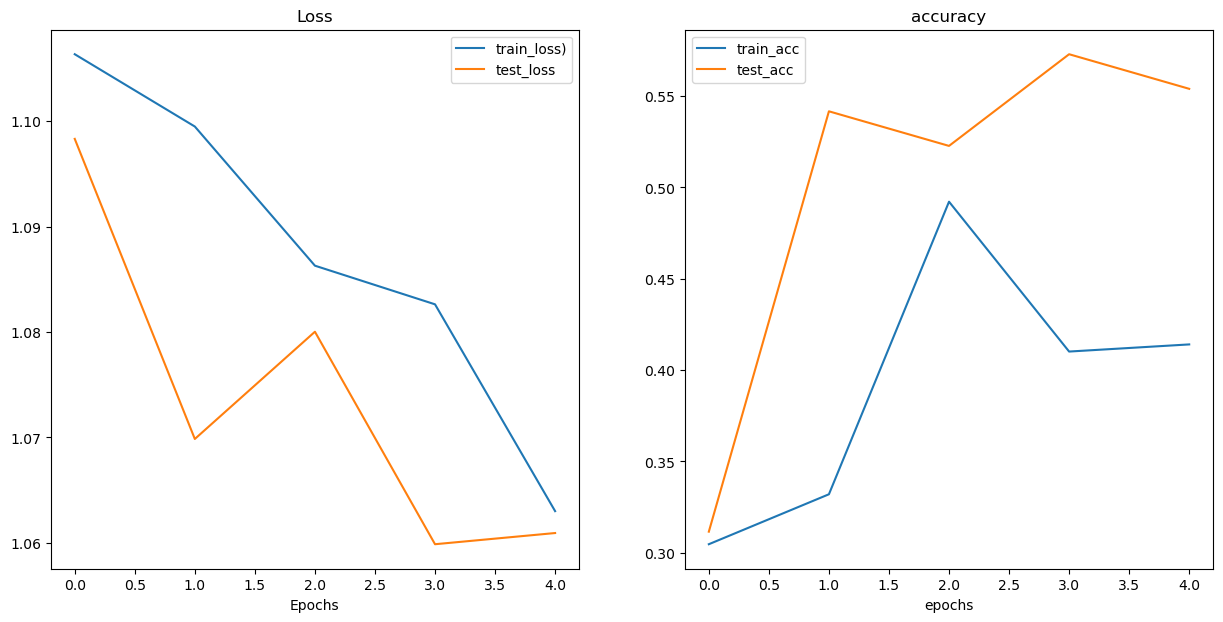

In [60]:
plot_loss_curves(model_0_results)

## 8. What should an ideal loss curve look like?

A loss curve is one of the most helpful ways to troubleshoot a model.

<img src="Custom_Dataset-2.png">

----

<img src="Custom_Dataset-3.png">

---

<img src="Custom_Dataset-4.png">

## 9.1 Model 1: TinyVGG with Data Augmentation

Now let's try another modelling experiment, this time using the same model as before but with some slight but with data augmentation.

### 9.1 Create transform with data augmentation

In [61]:
# Create training transform with TrivialAugment
train_transform_trivial = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform_simple = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

### 9.2 Create train and test `Dataset`s and `DataLoaders` with data augmentation

In [62]:
# Turn image folders into Datasets

train_data_augmented = datasets.ImageFolder(root=train_dir,
                                           transform=train_transform_trivial)

test_data_simple = datasets.ImageFolder(root=test_dir,
                                       transform=test_transform_simple)

In [63]:
# Turn our Datasets into DataLoaders
import os
BATCH_SIZE=32
NUM_WORKERS = 2

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(dataset=train_data_augmented,
                                       batch_size=BATCH_SIZE,
                                       shuffle=True,
                                       num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    num_workers=NUM_WORKERS,
                                    shuffle=False)

### 9.3 Construct and train model 1

This time we'll be using the same model architecture except this time we've augmented the training data

In [64]:
# Create model_1 and send it to the target device
torch.manual_seed(42)
model_1 = TinyVGG(input_shape=3,
                 hidden_units=10,
                 output_shape=len(train_data_augmented.classes)).to(device)

model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

Now we've got a model and dataloader, let's create a loss function and an optimizer and call our `train()` functions to train and evaluate

In [65]:
# Set the manual seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set epochs
NUM_EPOCHS = 5

# Setup loss function
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(),
                            lr=0.001)

# Start timer
start_time = timer()

# Train model 1
model_1_results = train(model=model_1,
                       train_dataloader=train_dataloader_augmented,
                       test_dataloader=test_dataloader_simple,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=NUM_EPOCHS,
                       device=device)

# End the timer
end_time = timer()
print(f"Total training time for model_1: {end_time-start_time: .3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train Loss: 1.1049 | Train Acc: 0.25% | Test Loss: 1.1019 | Test Acc: 0.26%
Epoch: 1 | Train Loss: 1.0807 | Train Acc: 0.43% | Test Loss: 1.1260 | Test Acc: 0.26%
Epoch: 2 | Train Loss: 1.0714 | Train Acc: 0.43% | Test Loss: 1.1585 | Test Acc: 0.26%
Epoch: 3 | Train Loss: 1.1250 | Train Acc: 0.30% | Test Loss: 1.1586 | Test Acc: 0.26%
Epoch: 4 | Train Loss: 1.0848 | Train Acc: 0.42% | Test Loss: 1.1553 | Test Acc: 0.32%
Total training time for model_1:  11.928 seconds


### 9.4 Plot the loss curve of model 1

A loss curve helps you evaluate your model performance overtime.

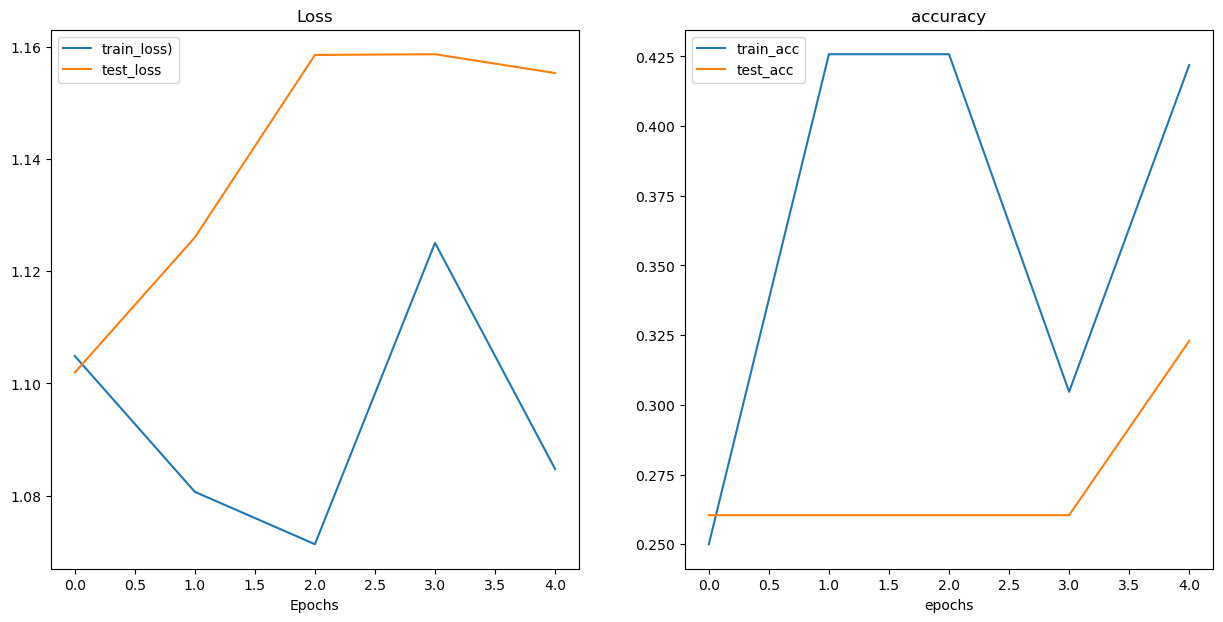

In [66]:
plot_loss_curves(model_1_results)

## 10. Compare model results

After evaluating our modelling experiments on their own, it's important to compare them to each other.

THere's a few ways to do this:
1. Hard Coding
2. PyTorch Tensorboard - https://pytorch.org/tutorials/intermediate/tensorboard_tutorial.html
3. Weights & Biases - https://wandb.ai/site/experiment-tracking
4. MLFlow - mlflow.org

In [67]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df

train_loss  train_acc  test_loss  test_acc
0    1.106342   0.304688   1.098314  0.311553
1    1.099484   0.332031   1.069851  0.541667
2    1.086287   0.492188   1.080022  0.522727
3    1.082621   0.410156   1.059868  0.572917
4    1.063006   0.414062   1.060929  0.553977

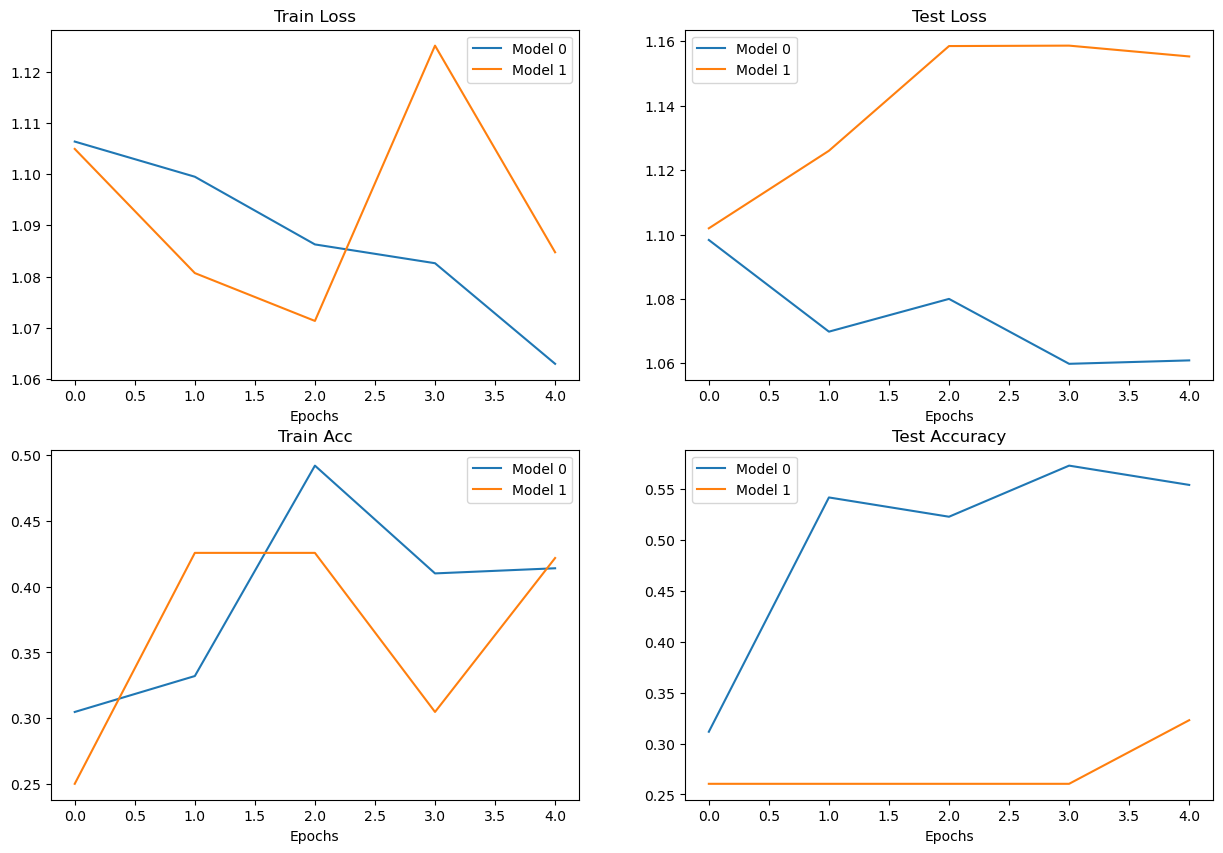

In [71]:
# Setup a plot
plt.figure(figsize=(15,10))

# Get number of epochs
epochs = range(len(model_0_df))

# Plot train loss
plt.subplot(2, 2, 1)
plt.plot(epochs, model_0_df['train_loss'], label='Model 0')
plt.plot(epochs, model_1_df['train_loss'], label='Model 1')
plt.title('Train Loss')
plt.xlabel('Epochs')
plt.legend()


# Plot test loss
plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_df['test_loss'], label='Model 0')
plt.plot(epochs, model_1_df['test_loss'], label='Model 1')
plt.title('Test Loss')
plt.xlabel('Epochs')
plt.legend()

# Plot train accuract
plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df['train_acc'], label='Model 0')
plt.plot(epochs, model_1_df['train_acc'], label='Model 1')
plt.title('Train Acc')
plt.xlabel('Epochs')
plt.legend()

# Plot test accuract
plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_df['test_acc'], label='Model 0')
plt.plot(epochs, model_1_df['test_acc'], label='Model 1')
plt.title('Test Accuracy')
plt.xlabel('Epochs')
plt.legend()


## 11. Making a prediction on a custom image

Although we have trained a model on custom data.... how do you make a prediction on a sample image that is neither in training or test dataset

In [72]:
# Download custom image
import requests

# Setup custom image path
custom_image_path = data_path / "04-pizza-dad.jpeg"

# Download the image if it doesn't already exist
if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:
        # When downloading from GitHub, need to use the "raw" file link
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
        print(f"Downloading {custom_image_path}...")
        f.write(request.content)
        
else : 
    print(f"{custom_image_path} already exist, not downloading")

### 11.1 Loading in a custom image with PyTorch

We have t make sure our custom image is in the same Format as the data our model was trained on.

* In tensor form with datatype(torch.float32)
* Of shape 64x64x3
* On the right device

We can read image into PyTorch using - `torchvision.io.read_image`

In [80]:
import torchvision

# Read in custom image
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))

print(f"Custom image tensor:\n {custom_image_uint8}")
print(f"Custom image shape: {custom_image_uint8.shape}")
print(f"Custom image datatype: {custom_image_uint8.dtype}")

Custom image tensor:
 tensor([[[154, 175, 181,  ...,  21,  18,  14],
         [146, 167, 180,  ...,  21,  18,  15],
         [124, 146, 171,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 189, 193,  ...,  22,  19,  15],
         [163, 181, 194,  ...,  22,  19,  16],
         [141, 163, 185,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 106, 104, 102],
         [ 47,  38,  24,  ..., 108, 105, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[117, 138, 145,  ...,  17,  14,  10],
         [109, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  54,  52,  50],
         [ 27,  18,   4,  ...,  50,  47,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)
Custom image shape: torch.Size([3, 4032, 3024])
Custom image data

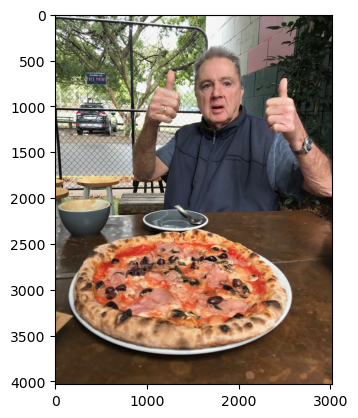

In [78]:
plt.imshow(custom_image_uint8.permute(1, 2, 0))

### 11.2 Making a prediction on a custom image wiht a trained PyTorch model

In [ ]:
# This gives type error
model_1.eval()
with torch.inference_mode():
    model_1(custom_image_uint8.to(device))

In [85]:
# Load in the custom image and convert to torch.float32

custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32) / 255.
custom_image

tensor([[[0.6039, 0.6863, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6549, 0.7059,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6706,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7412, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7098, 0.7608,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7255,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4157, 0.4078, 0.4000],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4118, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4588, 0.5412, 0.5686,  ..., 0.0667, 0.0549, 0.0392],
         [0.4275, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
         [0.3412, 0.4353, 0.5333,  ..., 0.0549, 0.0510, 0.

In [ ]:
# Gave error becoz of size mismathc
model_1.eval()
with torch.inference_mode():
    model_1(custom_image.to(device))

In [87]:
# Create transform pipeline to resize image

custom_image_transform = transforms.Compose([
    transforms.Resize(size=(64,64))
])

# Transform target image
custom_image_transformed = custom_image_transform(custom_image)

# Print out shapes
print(f"Original Shape: {custom_image.shape}")
print(f"Transformed shape: {custom_image_transformed.shape}")

Original Shape: torch.Size([3, 4032, 3024])
Transformed shape: torch.Size([3, 64, 64])


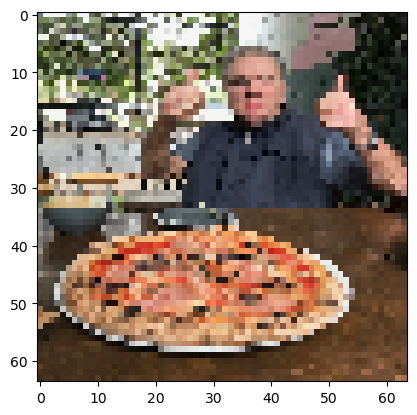

In [89]:
plt.imshow(custom_image_transformed.permute(1, 2, 0))

In [ ]:
# This will error: image not on same device

model_1.eval()
with torch.inference_mode():
    custom_image_pred = model_1(custom_image_transformed)

In [ ]:
# This will error: no batch size

model_1.eval()
with torch.inference_mode():
    custom_image_pred = model_1(custom_image_transformed.to(device))

In [93]:
custom_image_transformed.shape , custom_image_transformed.unsqueeze(0).shape

(torch.Size([3, 64, 64]), torch.Size([1, 3, 64, 64]))

In [94]:
model_1.eval()
with torch.inference_mode():
    custom_image_pred = model_1(custom_image_transformed.unsqueeze(0).to(device))
    
custom_image_pred

tensor([[ 0.0709,  0.0487, -0.2077]], device='cuda:0')

**Note : To make a prediction on a custom image we had to:**
* Load the image and turn it into a tensor
* Make sure the image was the same datatype as the model (torch.float32)
* Make sure the image was the same shape as the data the model was trained on (3x64x64) with a batch size... (1, 3, 64, 64)
* Make sure the image was on the same device as our model

In [96]:
# Convert logits -> prediction probabilities
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
print(custom_image_pred_probs)

# Convert prediction probabilities -> prediction labels
custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1).cpu()
custom_image_pred_label

tensor([[0.3656, 0.3576, 0.2767]], device='cuda:0')


tensor([0])

In [97]:
class_names[custom_image_pred_label]

'pizza'

### 11.3 Putting custom image predictions together: Building a function

Ideal outcome:
    
A function where we pass an image path to and have our model predict and plot the image+prediction.

In [102]:
def pred_and_plot_image(model: nn.Module,
                       image_path: str,
                       class_names: List[str]= None,
                       transform=None,
                       device=device):
    """ Makes a prediction on a target image with a trained model and plots the image and prediction."""
    # Load in the image
    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)
    
    # Divide the image pixel values by 255 to get then between [0, 1]
    target_image = target_image / 255.
    
    # Transform our data if necessary
    if transform:
        target_image = transform(target_image)
    
    # Make sure the model is on the target device
    model.to(device)
    
    # Turn on eval/inference mode and make a prediction
    model.eval()
    with torch.inference_mode():
        # Add an extra dimension to the image
        target_image = target_image.unsqueeze(0)
        
        # Make a prediction on the image with an extra dimension
        target_image_pred = model_1(target_image.to(device))
        
    # Convert the logits to prediction probs
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)
    
    # Convert pred probs to pred labels
    target_image_pred_labels = torch.argmax(target_image_pred_probs, dim=1)
    
    # Plot the image alongsize the prediction and prediction probability
    plt.imshow(target_image.squeeze().permute(1, 2, 0)) # Remove bath dimension and rearrange
    if class_names:
        title = f"Pred: {class_names[target_image_pred_labels.cpu()]} | Prob: {target_image_pred_probs.max().cpu(): .3f}"
        
    else:
        title = f"Pred: {target_image_pred_labels} | Prob: {target_image_pred_probs.max().cpu():.3f}"
        
    plt.title(title)
    plt.axis('Off');

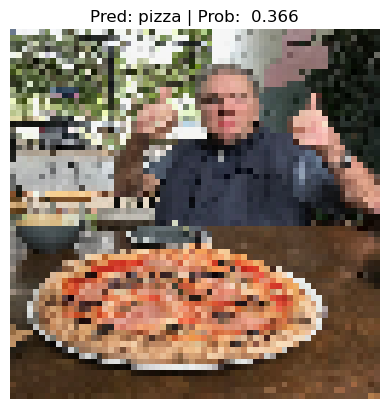

In [103]:
pred_and_plot_image(model=model_1,
                    image_path=custom_image_path,
                   class_names=class_names,
                   transform=custom_image_transform,
                   device=device)

----

<img src="Custom_Dataset-5.png">

# Main takeaways

We've covered a fair bit in this module.

Let's summarise it with a few dot points:-

* PyTorch has many in-built functions to deal with all kinds of data, from vision to text to audio to recommendation systems.
* If PyTorch's built-in data loading functions don't suit your requirements, you can write code to create your own custom datasets by subclassing `torch.utils.data.Dataset`.
* `torch.utils.data.DataLoader`'s in PyTorch help turn your Dataset's into iterables that can be used when training and testing a model.
* A lot of machine learning is dealing with the balance between **overfitting and underfitting** (we discussed different methods for each above, so a good exercise would be to research more and writing code to try out the different techniques).
* Predicting on your own custom data with a trained model is possible, as long as you format the data into a similar format to what the model was trained on. Make sure you take care of the three big PyTorch and deep learning errors:
    * **Wrong datatypes** - Your model expected `torch.float32` when your data is torch.uint8.
    * **Wrong data shapes** - Your model expected `[batch_size, color_channels, height, width]` when your data is `[color_channels, height, width]`.
    * **Wrong devices** - Your model is on the GPU but your data is on the CPU.

# Excersise

https://www.learnpytorch.io/04_pytorch_custom_datasets/#exercises